# MOVIE RATING PREDICTION CODSOFT INTERN TASK 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
file_path = r'C:\Users\KARTHIK\Downloads\IMDb Movies India.csv'


imdb_data = pd.read_csv(file_path, encoding="ISO-8859-1")


imdb_data.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [16]:
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
imdb_data.shape

(15509, 10)

In [19]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [20]:
imdb_data.describe()

,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [21]:
imdb_data.duplicated().sum()

6

In [22]:
imdb_data = imdb_data.drop_duplicates()

In [23]:
imdb_data.duplicated().sum()

0

In [24]:
imdb_data.isnull().sum()

Name           0
Year         527
Duration    8264
Genre       1876
Rating      7584
Votes       7583
Director     524
Actor 1     1615
Actor 2     2381
Actor 3     3140
dtype: int64

In [25]:
imdb_data.columns

Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [26]:
unique_genres = imdb_data['Genre'].unique()

In [27]:
unique_genres

array(['Drama', 'Drama, Musical', 'Comedy, Romance',
       'Comedy, Drama, Musical', 'Drama, Romance, War', 'Documentary',
       'Horror, Mystery, Thriller', 'Action, Crime, Thriller', 'Horror',
       'Horror, Romance, Thriller', 'Comedy, Drama, Romance', 'Thriller',
       'Comedy, Drama', nan, 'Comedy, Drama, Fantasy',
       'Comedy, Drama, Family', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Biography', 'Comedy, Horror', 'Action',
       'Drama, Horror, Mystery', 'Comedy', 'Action, Thriller',
       'Drama, History', 'Drama, History, Sport',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'War', 'Sport',
       'Biography, Drama, History', 'Horror, Romance', 'Crime, Drama',
       'Drama, Romance', 'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Dr

In [28]:
attr = ['Name', 'Year', 'Duration', 'Votes', 'Rating']
imdb_data.dropna(subset = attr, inplace = True)
missing_values = imdb_data.isnull().sum()
print(missing_values)

Name          0
Year          0
Duration      0
Genre        31
Rating        0
Votes         0
Director      1
Actor 1      75
Actor 2     117
Actor 3     163
dtype: int64


C:\Users\KARTHIK\AppData\Local\Temp\ipykernel_3784\932179349.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data.dropna(subset = attr, inplace = True)


In [29]:
rating_distribution =imdb_data['Rating'].value_counts()
rating_distribution

Rating
6.8     209
6.5     198
6.2     194
6.6     171
7.1     168
       ... 
1.6       2
1.4       1
9.7       1
10.0      1
1.1       1
Name: count, Length: 83, dtype: int64

In [30]:
imdb_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...,...
15493,Zubaan,(2015),115 min,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,Zubeidaa,(2001),153 min,"Biography, Drama, History",6.2,"1,496",Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [31]:
movie_rating = imdb_data[['Name', 'Director', 'Rating']]
movie_rating

,Name,Director,Rating
1,#Gadhvi (He thought he was Gandhi),Gaurav Bakshi,7.0
3,#Yaaram,Ovais Khan,4.4
5,...Aur Pyaar Ho Gaya,Rahul Rawail,4.7
6,...Yahaan,Shoojit Sircar,7.4
8,?: A Question Mark,Allyson Patel,5.6
...,...,...,...
15493,Zubaan,Mozez Singh,6.1
15494,Zubeidaa,Shyam Benegal,6.2
15503,Zulm Ki Zanjeer,S.P. Muthuraman,5.8
15505,Zulmi,Kuku Kohli,4.5


NameError: name 'top_movies' is not defined

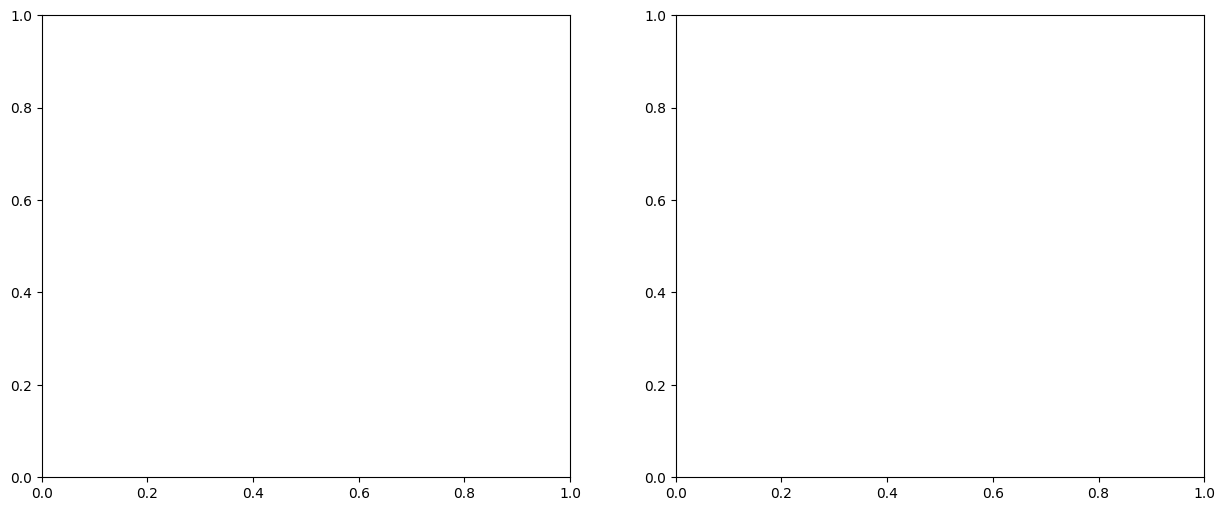

In [32]:
op_movies = imdb_data.sort_values(by='Rating', ascending=False).head(10)
top_directors = imdb_data.sort_values(by='Rating', ascending=False).head(10)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

ax1.barh(top_movies['Name'], top_movies['Rating'], color='orange')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Name')
ax1.set_title('Ratings vs Movie', size=20)
ax1.invert_yaxis()

ax2.barh(top_directors['Director'], top_directors['Rating'], color='lightblue')
ax2.set_xlabel('Rating')
ax2.set_ylabel('Director')
ax2.set_title('Ratings vs Directors', size=20)
ax2.invert_yaxis()

plt.suptitle('Top Movies and Directors by Rating', size=30)
plt.tight_layout(w_pad=5)
plt.show()

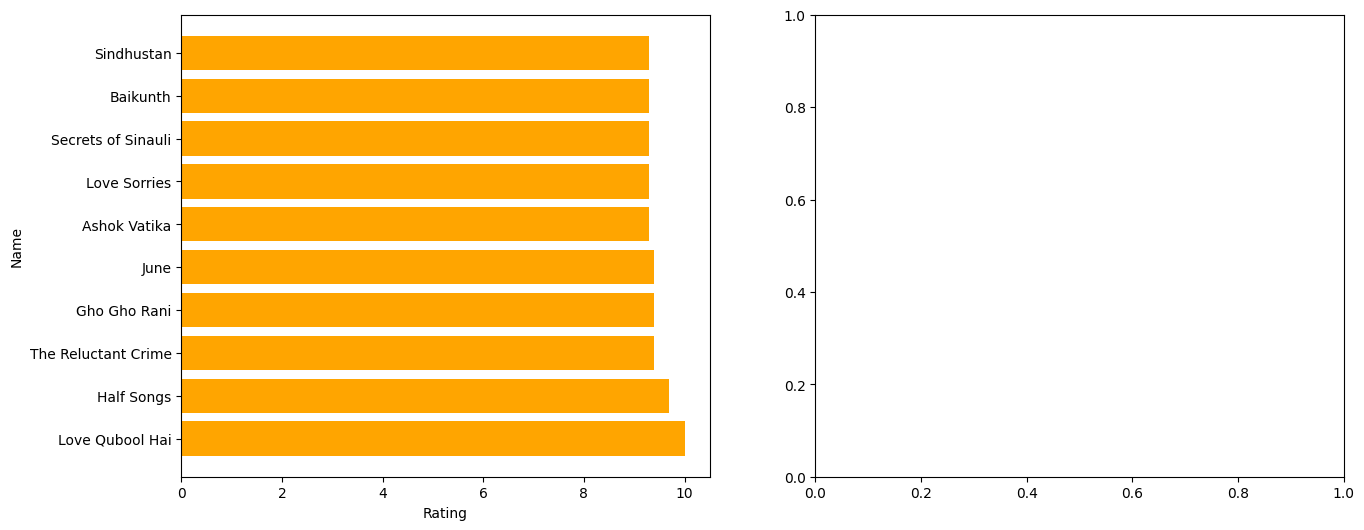

In [34]:
top_movies = imdb_data.sort_values(by='Rating', ascending=False).head(10)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.barh(top_movies['Name'], top_movies['Rating'], color='orange')
ax1.set_xlabel('Rating')
ax1.set_ylabel('Name')
plt.show()

C:\Users\KARTHIK\AppData\Local\Temp\ipykernel_3784\3373421939.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  imdb_data['Votes'] = pd.to_numeric(imdb_data['Votes'], errors='coerce')


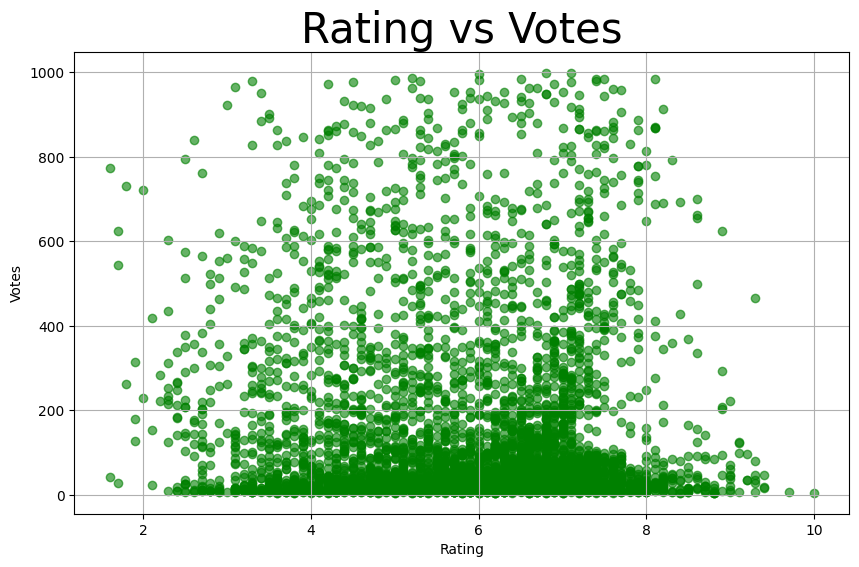

In [37]:
imdb_data['Votes'] = pd.to_numeric(imdb_data['Votes'], errors='coerce')
plt.figure(figsize = (10,6))
plt.scatter(imdb_data['Rating'],imdb_data['Votes'], alpha=0.6, color='g')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes', size=30)
plt.grid(True)
plt.show()

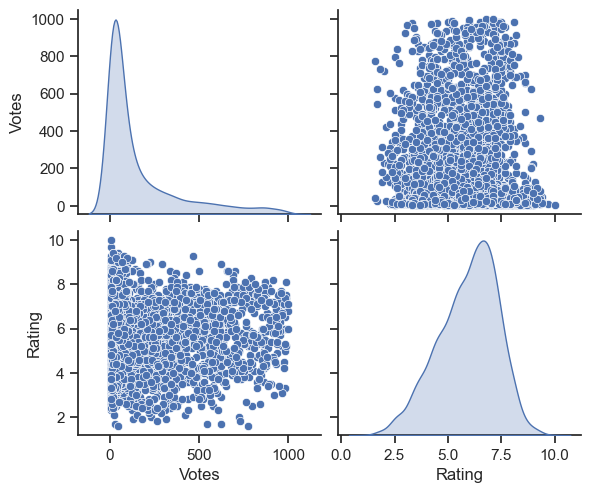

In [39]:
col = ['Votes', 'Rating', 'Year', 'Duration']
sns.set(style = 'ticks')
sns.pairplot(imdb_data[col], diag_kind = 'kde', markers = 'o', height = 2.5, aspect = 1.2)
plt.show()

In [44]:
imdb_data_sorted = imdb_data.sort_values(by = 'Votes', ascending = False)
imdb_data_sorted['Vote Count Percentile'] = imdb_data_sorted['Votes'].rank(pct = True)*100
imdb_data_sorted.reset_index(drop = True, inplace = True)
imdb_data_sorted[['Name', 'Votes', 'Vote Count Percentile']]

,Name,Votes,Vote Count Percentile
0,Satyam Shivam Sundaram: Love Sublime,999.0,100.000000
1,Hera Pheri,998.0,99.977689
2,Kurukshetra,996.0,99.955377
3,Dishkiyaoon,986.0,99.933066
4,Kadvi Hawa,985.0,99.899598
...,...,...,...
5846,Ziddi,NaN,NaN
5847,Zila Ghaziabad,NaN,NaN
5848,Zinda,NaN,NaN
5849,Zindagi Na Milegi Dobara,NaN,NaN


In [45]:
imdb_data = imdb_data.dropna(subset = 'Votes')
imdb_data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109 min,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110 min,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147 min,"Comedy, Drama, Musical",4.7,827.0,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,?: A Question Mark,2012,82 min,"Horror, Mystery, Thriller",5.6,326.0,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,2014,116 min,"Action, Crime, Thriller",4.0,11.0,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon
10,1:1.6 An Ode to Lost Love,2004,96 min,Drama,6.2,17.0,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni
11,1:13:7 Ek Tera Saath,2016,120 min,Horror,5.9,59.0,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani
12,100 Days,1991,161 min,"Horror, Romance, Thriller",6.5,983.0,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey
13,100% Love,2012,166 min,"Comedy, Drama, Romance",5.7,512.0,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh
18,10ml LOVE,2010,87 min,"Comedy, Drama, Romance",6.3,162.0,Sharat Katariya,Neil Bhoopalam,Anusha Bose,Manu Rishi Chadha


In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 36)

In [48]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [49]:
model.fit(X_train, y_train)

LinearRegression()

In [50]:
y_pred = model.predict(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred, squared = False)
r2 = r2_score(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {mse}')
print(f'R-squared (R2) Score: {mae}')

Mean Absolute Error: 1.031808057800943
Root Mean Squared Error: 1.3014836232576243
R-squared (R2) Score: 1.031808057800943


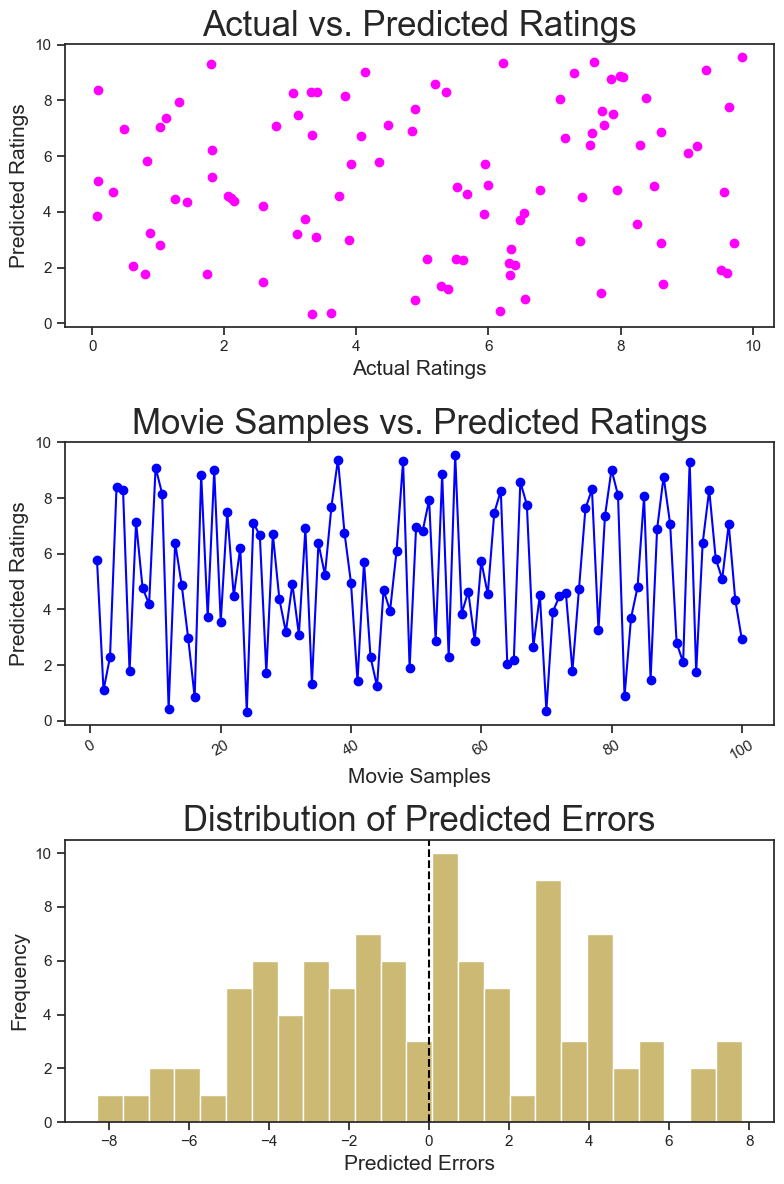

In [52]:
y_test = np.random.rand(100)*10 
y_pred = np.random.rand(100)*10
errors = y_test-y_pred
fig, axs = plt.subplots(3,1, figsize=(8,12))

#Scatter Plot
axs[0].scatter(y_test, y_pred, color='magenta')
axs[0].set_xlabel('Actual Ratings', size=15)
axs[0].set_ylabel('Predicted Ratings', size=15)
axs[0].set_title('Actual vs. Predicted Ratings', size = 25)

#Linear Plot
movie_samples = np.arange(1,len(y_pred)+1)
axs[1].plot(movie_samples, y_pred, marker = 'o', linestyle = '-', color='blue')
axs[1].set_xlabel('Movie Samples', size=15)
axs[1].set_ylabel('Predicted Ratings', size=15)
axs[1].set_title('Movie Samples vs. Predicted Ratings', size = 25)
axs[1].tick_params(axis='x', rotation = 30)

#Histogram
axs[2].hist(errors, bins = 25, color='y')
axs[2].set_xlabel('Predicted Errors', size=15)
axs[2].set_ylabel('Frequency', size=15)
axs[2].set_title('Distribution of Predicted Errors', size = 25)
axs[2].axvline(x=0, color = 'black', linestyle='--')
plt.tight_layout()
plt.show()